In [112]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%qtconsole

In [113]:
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\processed\\'
docs_img_dir = 'C:\\Users\\bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\docs\\img\\'

In [114]:
df_train_val = pd.read_csv(data_raw_dir + 'training_values.csv')
df_test_val = pd.read_csv(data_raw_dir + 'test_values.csv')
df_train_lab = pd.read_csv(data_raw_dir + 'training_labels.csv')

df_comp_val = pd.read_csv(data_interim_dir + 'comp_data_clean_impv2_geo-corr.csv')

C:\Users\bryan\Anaconda3\envs\geo_code\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   installer              74250 non-null  object 
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   region                 74250 non-null  object 
 8   district_code          74250 non-null  int64  
 9   population             74250 non-null  int64  
 10  public_meeting         74250 non-null  int64  
 11  permit                 74250 non-null  int64  
 12  extraction_type_class  74250 non-null  object 
 13  management             74250 non-null  object 
 14  payment_type           74250 non-null  object 
 15  wa

Need to encode all object and categorical values.

### amount_tsh

In [116]:
var = 'amount_tsh'

df_comp_val[var].value_counts()

0.00         52049
500.00        3874
50.00         3103
1000.00       1858
20.00         1812
             ...  
59.00            1
38000.00         1
120000.00        1
220.00           1
0.25             1
Name: amount_tsh, Length: 102, dtype: int64

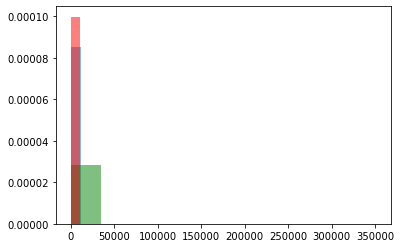

In [117]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

### gps_height

In [118]:
var = 'gps_height'
var_red = var+'_reduced'

df_comp_val[var].value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2353        1
 2417        1
 2545        1
 2416        1
 2285        1
Name: gps_height, Length: 2456, dtype: int64

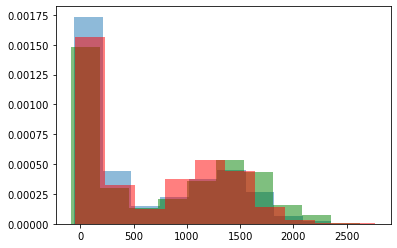

In [119]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

### installer

In [124]:
var = 'installer'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[8:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

DWE           21751
unknown        4533
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
Name: installer, dtype: int64

In [126]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other         39344
DWE           21751
unknown        4533
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
Name: installer_reduced, dtype: int64

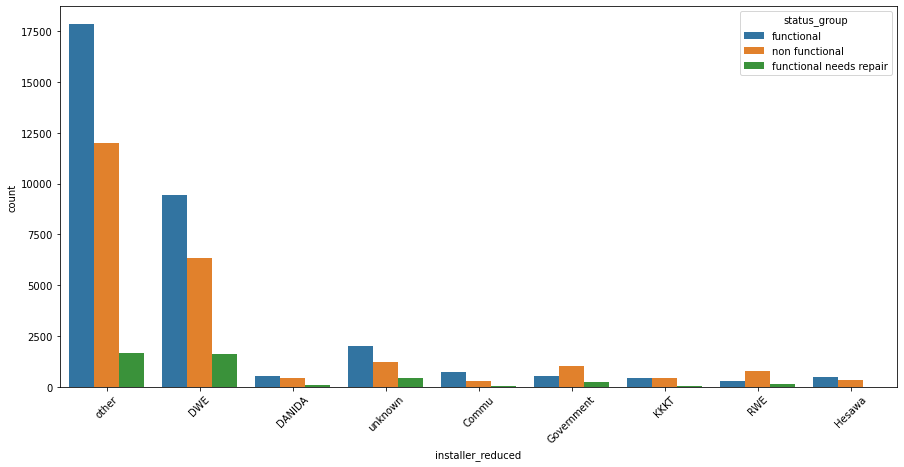

In [127]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [102]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [103]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### basin

In [107]:
var = 'basin'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

In [89]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other    74250
Name: basin_reduced, dtype: int64

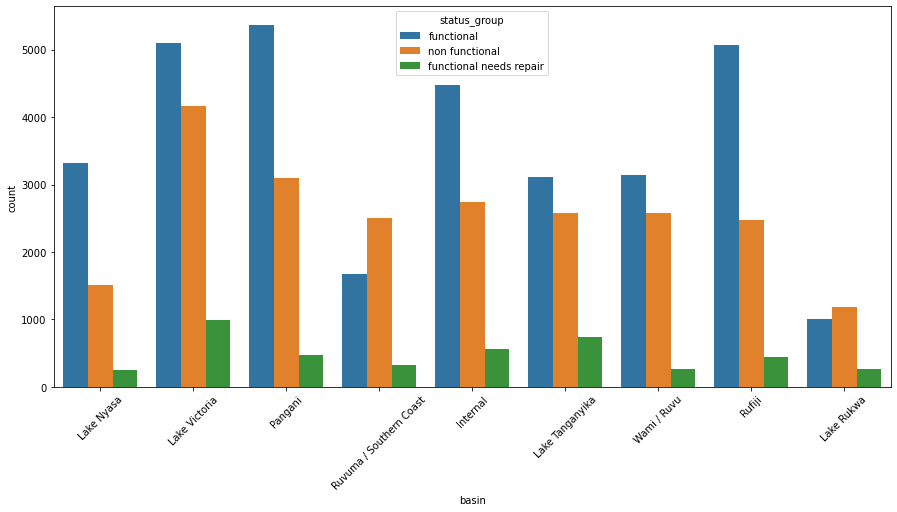

In [108]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [109]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [110]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### region

In [130]:
var = 'region'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Kilimanjaro      5503
Morogoro         5073
Njombe           4574
Arusha           4096
Mbeya            4056
Kagera           3884
Kigoma           3533
Simiyu           3427
Pwani            3329
Ruvuma           3306
Tanga            3150
Mwanza           2958
Dodoma           2780
Singida          2534
Shinyanga        2525
Tabora           2489
Mara             2450
Mtwara           2144
Iringa           2006
Manyara          1980
Lindi            1920
Songwe           1718
Geita            1548
Rukwa            1390
Dar es Salaam    1025
Katavi            852
Name: region, dtype: int64

In [20]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other          50948
Kilimanjaro     5503
Morogoro        5073
Njombe          4574
Arusha          4096
Mbeya           4056
Name: region_reduced, dtype: int64

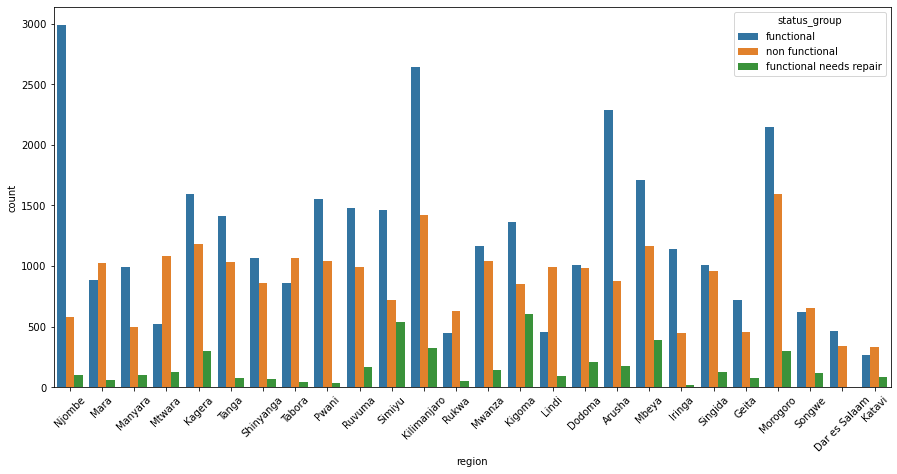

In [129]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [22]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [23]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

## population

<AxesSubplot:>

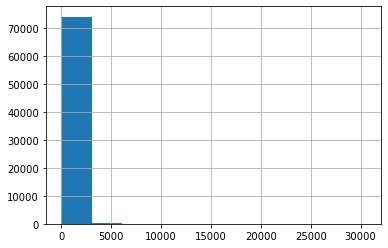

In [24]:
var = 'population'

df_comp_val[var].hist()

In [25]:
df_comp_val[var+'_bin'] = pd.qcut(df_comp_val[var],4,duplicates='drop').astype(str)

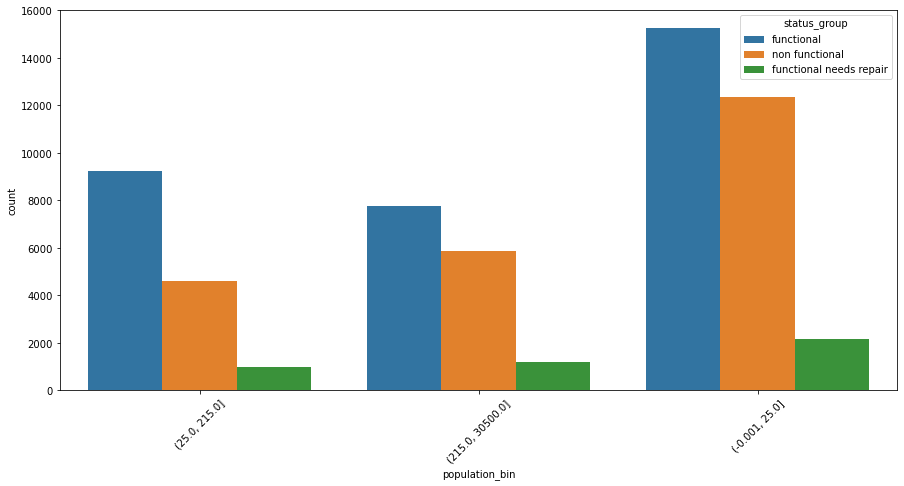

In [26]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [27]:
#df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var+'_bin'],prefix=var)],axis=1)
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

### extraction_type_class

In [28]:
var = 'extraction_type_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

gravity        33263
handpump       20612
other           8102
submersible     7772
motorpump       3777
Name: extraction_type_class, dtype: int64

In [29]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

gravity        33263
handpump       20612
other           8826
submersible     7772
motorpump       3777
Name: extraction_type_class_reduced, dtype: int64

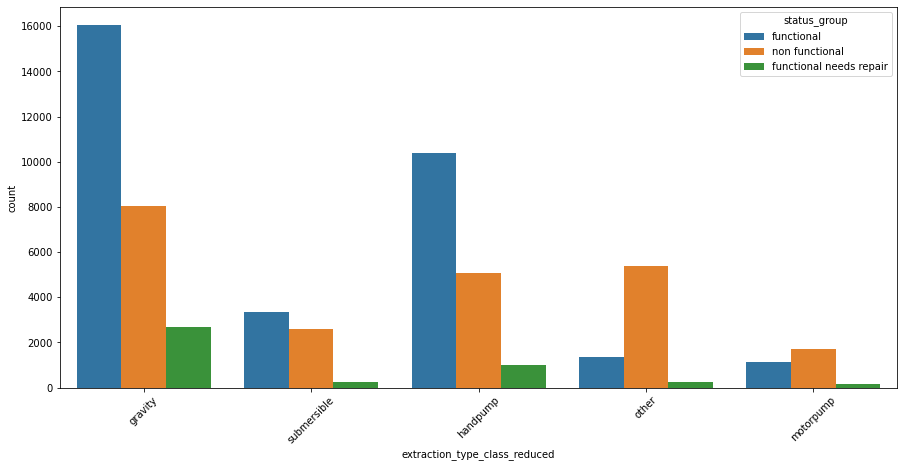

In [30]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [31]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [32]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### management

In [33]:
var = 'management'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
Name: management, dtype: int64

In [34]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

vwc                 50624
wug                  8108
other                3979
water board          3688
wua                  3118
private operator     2504
parastatal           2229
Name: management_reduced, dtype: int64

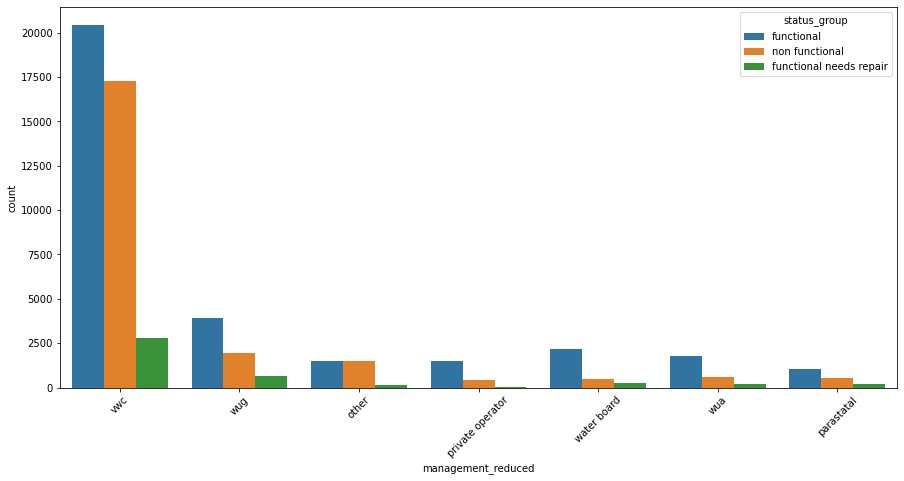

In [35]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [36]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [37]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### payment_type

In [38]:
var = 'payment_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
Name: payment_type, dtype: int64

In [39]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type_reduced, dtype: int64

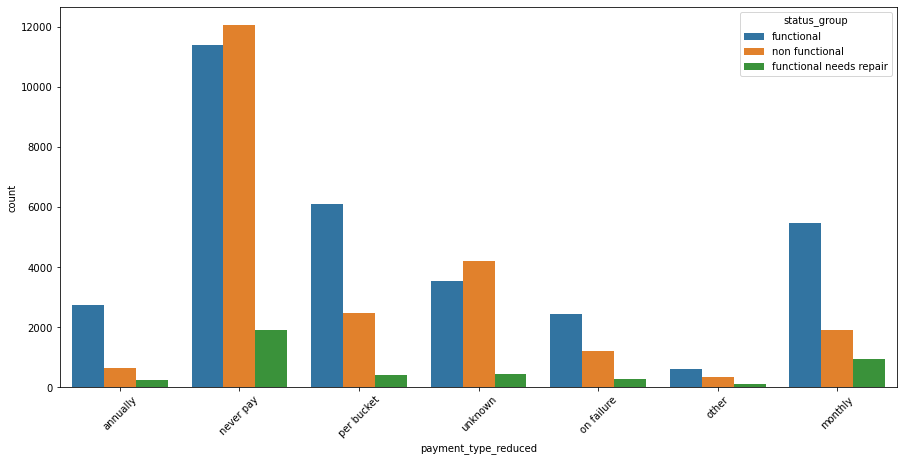

In [40]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [41]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [42]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### water_quality

In [43]:
var = 'water_quality'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[3:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

soft       63505
salty       6082
unknown     2345
Name: water_quality, dtype: int64

In [44]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

soft       63505
salty       6082
unknown     2345
other       2318
Name: water_quality_reduced, dtype: int64

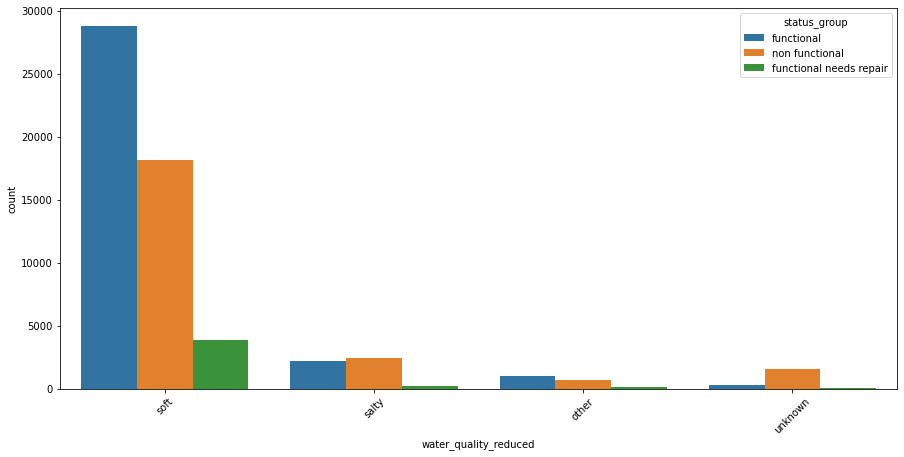

In [45]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [46]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [47]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### quantity

In [48]:
var = 'quantity'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
Name: quantity, dtype: int64

In [49]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
other             975
Name: quantity_reduced, dtype: int64

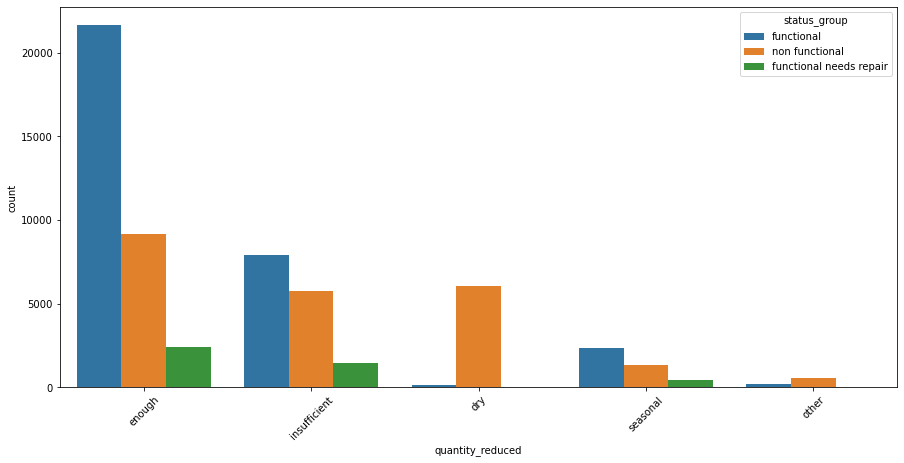

In [50]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [51]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [52]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source

In [53]:
var = 'source'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
Name: source, dtype: int64

In [54]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
other                    3245
rainwater harvesting     2863
Name: source_reduced, dtype: int64

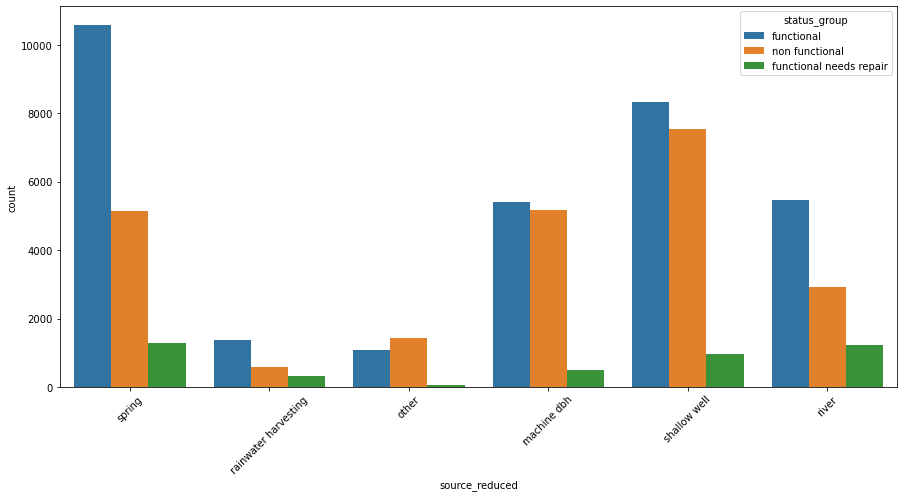

In [55]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [56]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source_class

In [57]:
var = 'source_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[2:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

groundwater    57286
surface        16617
Name: source_class, dtype: int64

In [58]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

groundwater    57286
surface        16617
other            347
Name: source_class_reduced, dtype: int64

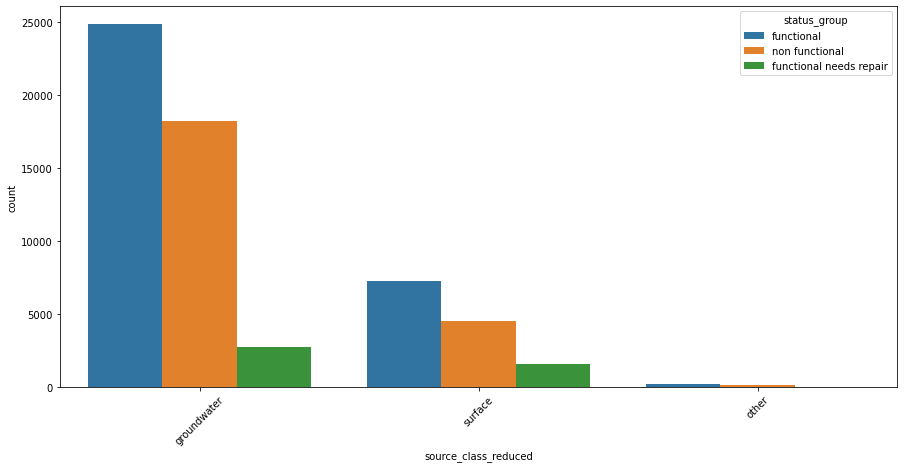

In [59]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [60]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [61]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### waterpoint_type

In [62]:
var = 'waterpoint_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
Name: waterpoint_type, dtype: int64

In [63]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

communal standpipe             35628
hand pump                      21884
other                           9127
communal standpipe multiple     7611
Name: waterpoint_type_reduced, dtype: int64

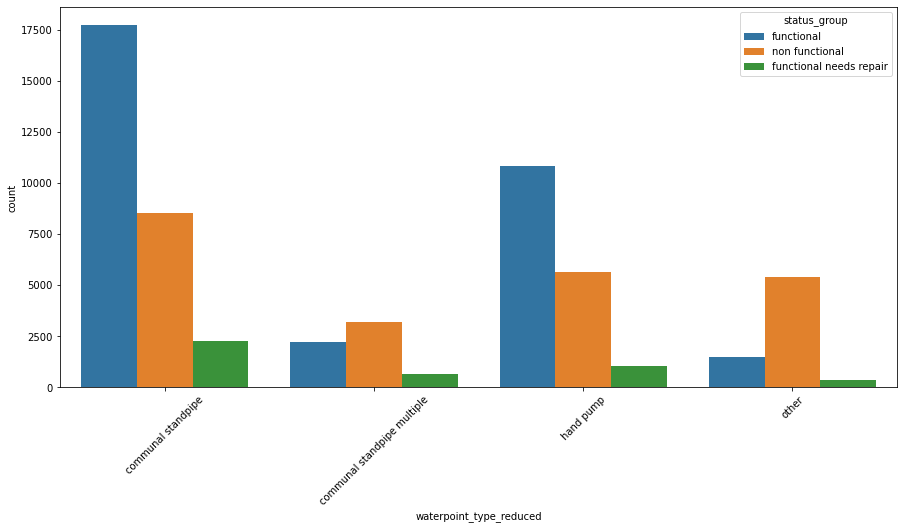

In [64]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [65]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [66]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### pump_age

In [67]:
var = 'pump_age'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index < 0]
df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index <= 10]

 3.0     3390
 1.0     2903
 2.0     2723
 5.0     2490
 4.0     2324
 7.0     1809
 6.0     1732
 8.0     1440
 10.0    1060
 9.0     1006
 0.0      729
-4.0        3
-5.0        3
-2.0        2
-7.0        2
-1.0        1
-3.0        1
Name: pump_age, dtype: int64

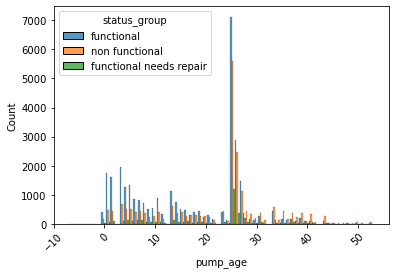

In [68]:
sns.histplot(data=df_comp_val,x=var,hue='status_group',multiple='dodge')
plt.xticks(rotation=45);

In [69]:
q20 = df_comp_val[var].quantile(0.2)
q40 = df_comp_val[var].quantile(0.4)
q60 = df_comp_val[var].quantile(0.6)
q80 = df_comp_val[var].quantile(0.8)
q100 = df_comp_val[var].quantile(1)

df_comp_val[var+'_bin'] = pd.cut(df_comp_val[var],bins=[0,q20,q40,q60,q80,q100],labels=['0-20','20-40','40-60','60-80','80-100']).astype(str)

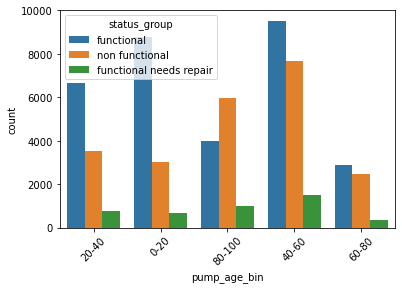

In [70]:
sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [71]:
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

## Feature Review

In [72]:
df_comp_val.iloc[:3,:]

,id,amount_tsh,gps_height,longitude,latitude,district_code,population,public_meeting,permit,pump_age,...,quantity_insufficient,quantity_other,quantity_seasonal,source_class_groundwater,source_class_other,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other
0,69572,6000.0,1390,34.938093,-9.856322,5,109,1,1,12.0,...,0,0,0,1,0,0,1,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,2,280,1,1,3.0,...,1,0,0,0,0,1,1,0,0,0
2,34310,25.0,686,37.460664,-3.821329,4,250,1,1,4.0,...,0,0,0,0,0,1,0,1,0,0


In [73]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           74250 non-null  int64  
 1   amount_tsh                                   74250 non-null  float64
 2   gps_height                                   74250 non-null  int64  
 3   longitude                                    74250 non-null  float64
 4   latitude                                     74250 non-null  float64
 5   district_code                                74250 non-null  int64  
 6   population                                   74250 non-null  int64  
 7   public_meeting                               74250 non-null  int64  
 8   permit                                       74250 non-null  int64  
 9   pump_age                                     74250 non-null  float64
 10

In [74]:
train_index = df_train_val.id.tolist()
test_index = df_test_val.id.tolist()

df_train_val_new = df_comp_val[df_comp_val.id.isin(train_index)]


df_train_val_new.to_csv(data_processed_dir+'training_data_encoded_impv2_geo-corr.csv',index=False)

df_test_val_new = df_comp_val[df_comp_val.id.isin(test_index)]
df_test_val_new.to_csv(data_processed_dir+'test_data_encoded_impv2_geo-corr.csv',index=False)